# Comparação entre os modelos utilizando a base de dados MNIST

In [1]:
from sklearn.datasets import fetch_openml

import joblib
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np

from io import BytesIO
import requests
import time

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist["data"]
y = mnist["target"]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
kfolds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [5]:
X_treino, y_treino, X_teste, y_teste = [],[],[],[]

for idx_treino, idx_teste in kfolds.split(X, y):
  X_treino.append(idx_treino)
  y_treino.append(idx_treino)
  X_teste.append(idx_teste)
  y_teste.append(idx_teste)


## Algoritmo KNN

In [7]:
mLink = 'https://github.com/diegonogare/MachineLearning/blob/main/modelo_knn_mnist.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
modelo_knn = joblib.load(mfile)

['0' '2' '2' ... '7' '6' '1']
--- 29.40781283378601 segundos para fazer o scoring do modelo ---
***********************************
MATRIZ DE CONFUSÃO DA PASTA  0
***********************************
[[690   0   0   0   0   0   0   0   0   0]
 [  0 788   0   0   0   0   0   0   0   0]
 [  0   0 699   0   0   0   0   0   0   0]
 [  0   0   0 714   0   0   0   0   0   0]
 [  0   0   0   0 682   0   0   0   0   0]
 [  0   0   0   0   0 632   0   0   0   0]
 [  0   0   0   0   0   0 688   0   0   0]
 [  0   0   0   0   0   0   0 729   0   0]
 [  0   0   0   0   0   0   0   0 682   0]
 [  0   0   0   0   0   0   0   0   0 696]]
['8' '4' '7' ... '4' '5' '6']
--- 30.955138206481934 segundos para fazer o scoring do modelo ---
***********************************
MATRIZ DE CONFUSÃO DA PASTA  1
***********************************
[[690   0   0   0   0   0   0   0   0   0]
 [  0 788   0   0   0   0   0   0   0   0]
 [  0   0 699   0   0   0   0   0   0   0]
 [  0   0   0 714   0   0   0   0   0   0

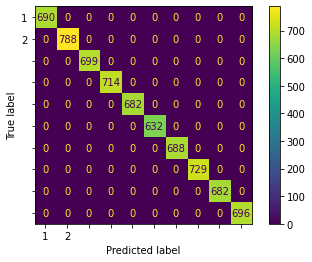

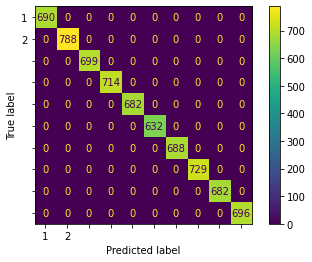

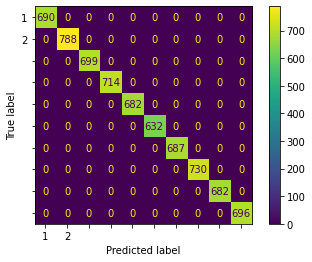

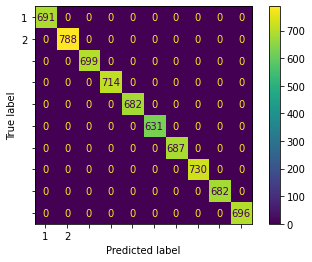

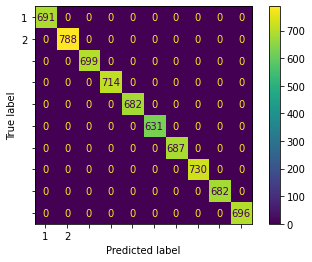

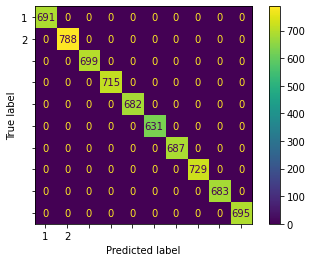

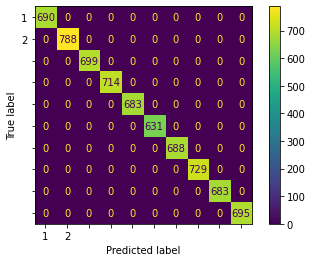

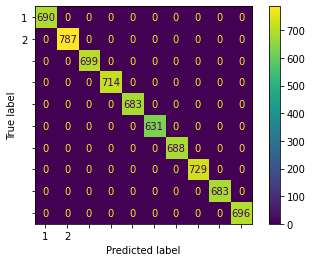

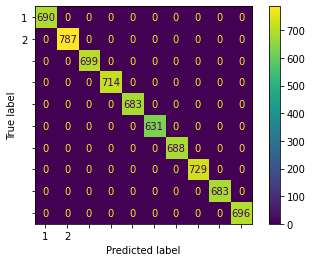

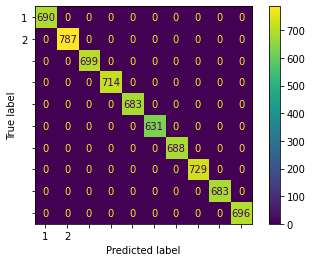

In [15]:
for pasta in range(0,len(X_teste)):
  print("***********************************")
  print("EXECUÇÃO DA PASTA ", pasta)
  print("***********************************")

  X_testeMNIST = X_teste[pasta].tolist()
  y_testeMNIST = y_teste[pasta].tolist()

  inicio = time.time()
  predicao = modelo_knn.predict(X.loc[X_testeMNIST])
  termino = time.time()
  print(predicao)
  print("--- %s segundos para fazer o scoring do modelo ---" % (termino - inicio))

  matriz_confusao = confusion_matrix(y.loc[y_testeMNIST], predicao)
  print(matriz_confusao)

  matriz_confusao_visual = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao,display_labels = np.array([1,2]))
  matriz_confusao_visual.plot();

## Algoritmo Decision Tree

## Algoritmo Multi-Layer Perceptron